In [1]:
# for inline image display inside notebook
# % matplotlib inline 
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
from PyQt5.QtWidgets import QApplication
import imageio

/home/teguhteja/anaconda3/lib/python3.7/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [3]:
im = Image.open("../images/parrot.png") # read the image, provide the correct path
print(im.width, im.height, im.mode, im.format, type(im))
# 453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
im.show() # display the image 

453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


In [4]:
im_g = im.convert('L')                         # convert the RGB color image to a grayscale image
im_g.save('../images/parrot_gray.png')         # save the image to disk
Image.open("../images/parrot_gray.png").show() # read the grayscale image from disk and show

(750, 1000, 3) float32 <class 'numpy.ndarray'>


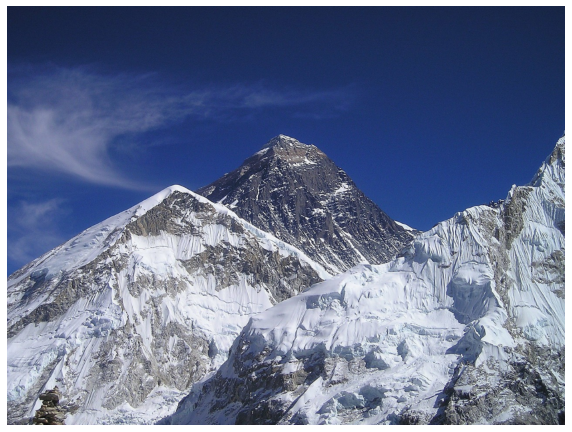

In [7]:
im = mpimg.imread("../images/hill.png")  # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im))      # this image contains an α channel, hence num_channels= 4
# (960, 1280, 4) float32 <class 'numpy.ndarray'>
plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()

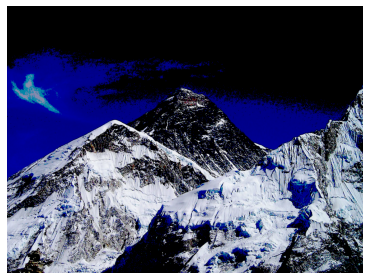

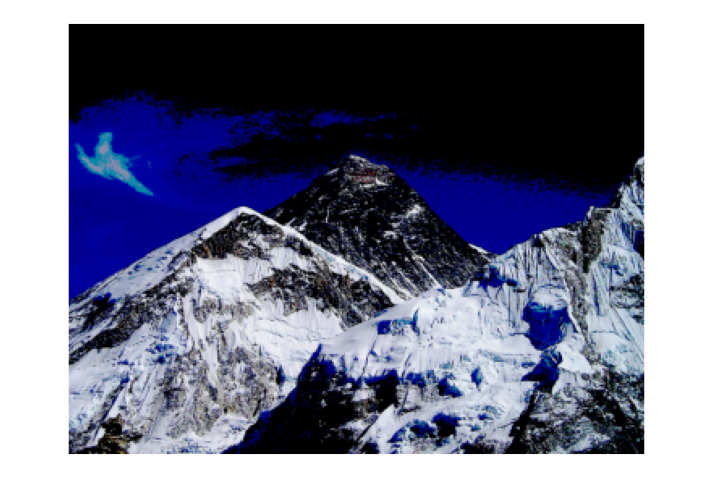

In [8]:
im1 = im 
im1[im1 < 0.5] = 0    # make the image look darker
plt.imshow(im1)
plt.axis('off')
plt.tight_layout()
plt.savefig("../images/hill_dark.png")       # save the dark image
im = mpimg.imread("../images/hill_dark.png") # read the dark image
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off') # no axis ticks
plt.tight_layout()
plt.show()

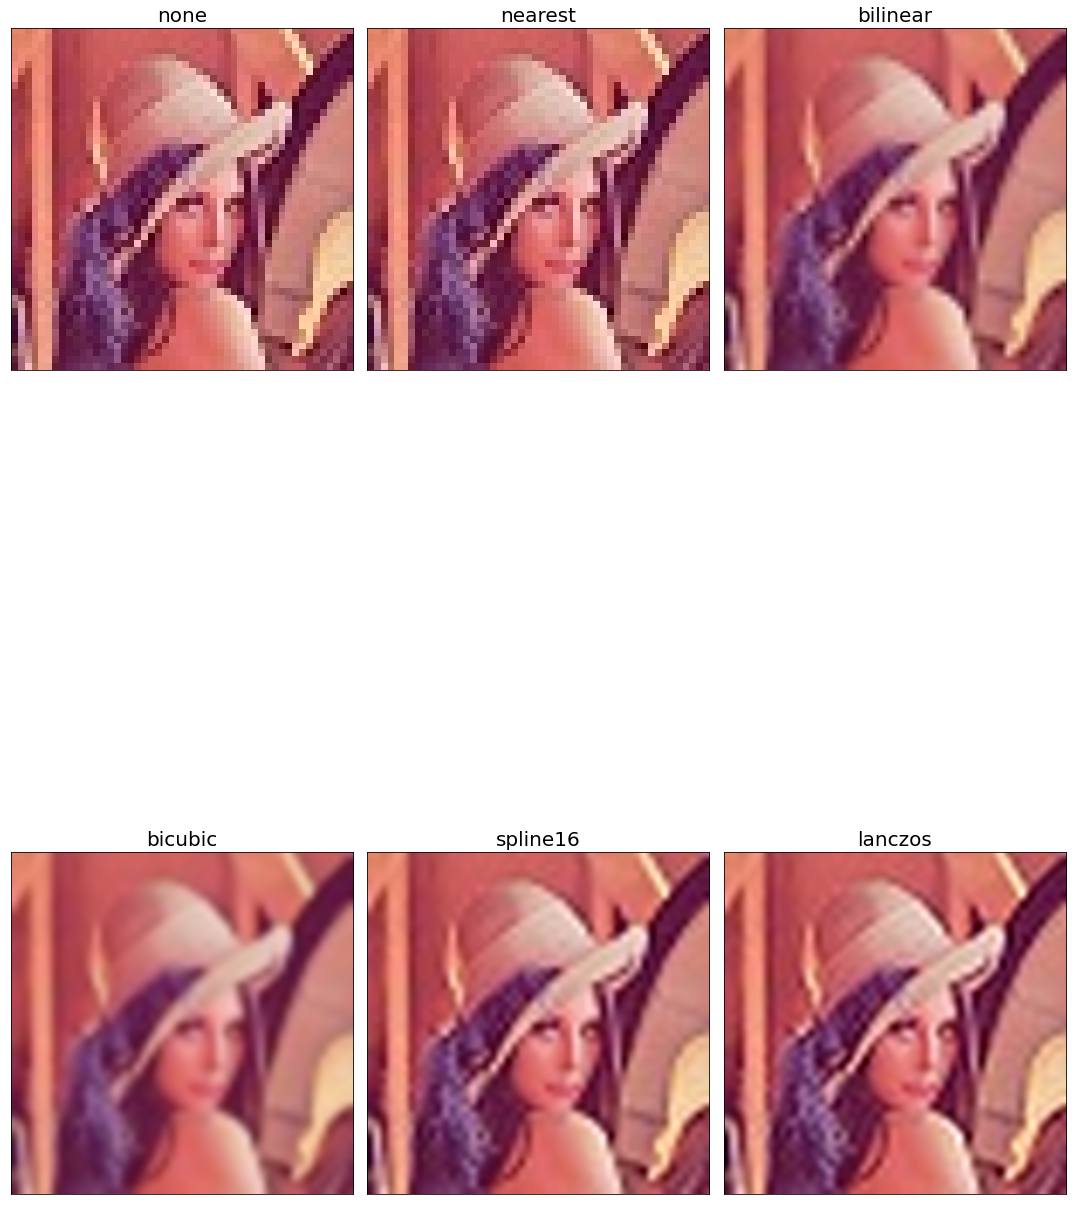

In [9]:
im = mpimg.imread("../images/lena_small.jpg") # read the image from disk as a numpy ndarray
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 30),
 subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
 ax.imshow(im, interpolation=interp_method)
 ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

(340, 453, 3) uint8 <class 'numpy.ndarray'>
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


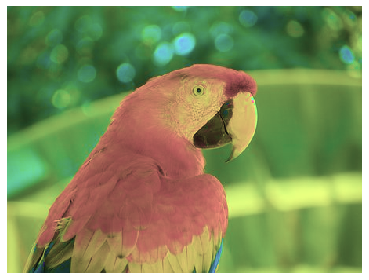

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x7f3d04b34950>, None)

In [10]:
im = imread("../images/parrot.png")     # read image from disk, provide the correct path
print(im.shape, im.dtype, type(im)) 
# (362, 486, 3) uint8 <class 'numpy.ndarray'>
hsv = color.rgb2hsv(im) # from RGB to HSV color space
hsv[:, :, 1] = 0.5 # change the saturation
im1 = color.hsv2rgb(hsv) # from HSV back to RGB
imsave('../images/parrot_hsv.png', im1) # save image to disk
im = imread("../images/parrot_hsv.png")
plt.axis('off'), imshow(im), show()

In [19]:
# viewer = ImageViewer(im)
# viewer.show()

/home/teguhteja/P/PythonProject/imgprocpython/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `viewer` is deprecated and will be removed in 0.20. For alternatives, refer to https://scikit-image.org/docs/stable/user_guide/visualization.html
  """Entry point for launching an IPython kernel.


AttributeError: 'QtGui_cls' object has no attribute 'QApplication'

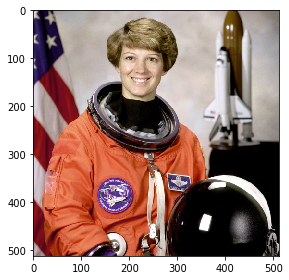

(<matplotlib.image.AxesImage at 0x7f3d04f345d0>, None)

In [20]:
im = data.astronaut() 
imshow(im), show()

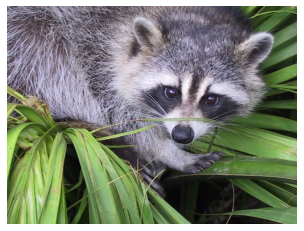

(<matplotlib.image.AxesImage at 0x7f3d04f050d0>,
 (-0.5, 1023.5, 767.5, -0.5),
 None)

In [24]:
im = misc.face() # load the raccoon's face image
imageio.imsave('face.png', im) # uses the Image module (PIL)
plt.imshow(im), plt.axis('off'), plt.show()

In [26]:
im = imageio.imread('../images/pepper.jpg')
print(type(im), im.shape, im.dtype)
# <class 'numpy.ndarray'> (225, 225, 3) uint8

<class 'imageio.core.util.Array'> (225, 225, 3) uint8


<class 'imageio.core.util.Array'> (225, 225, 3) uint8


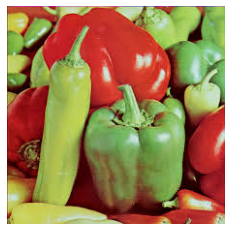

(<matplotlib.image.AxesImage at 0x7f3d25d29d90>,
 (-0.5, 224.5, 224.5, -0.5),
 None)

In [28]:
import imageio
im = imageio.imread('../images/pepper.jpg')
print(type(im), im.shape, im.dtype)
# <class 'imageio.core.util.Image'> (225, 225, 3) uint8
plt.imshow(im), plt.axis('off'), plt.show()